In [1]:
from langgraph.graph import StateGraph , START , END 
from typing import TypedDict , Annotated , Sequence , Union
from langchain_core.messages import  SystemMessage , BaseMessage , ToolMessage , HumanMessage
from langchain_groq import ChatGroq
from langgraph.prebuilt import ToolNode
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langchain_community.tools import DuckDuckGoSearchResults
import requests
from datetime import datetime
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [3]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage] , add_messages]

In [4]:
groq_api_key = os.getenv("groq_api_key")

In [5]:
model = ChatGroq(model= "llama3-70b-8192" , api_key=groq_api_key , temperature=0.7)

In [6]:
model.invoke("hii! ")

AIMessage(content="Hii! How's it going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 14, 'total_tokens': 23, 'completion_time': 0.029029274, 'prompt_time': 0.000184168, 'queue_time': 0.057191611, 'total_time': 0.029213442}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--8a055ec4-c012-4e76-97d4-b8516860d45e-0', usage_metadata={'input_tokens': 14, 'output_tokens': 9, 'total_tokens': 23})

In [7]:
@tool
def get_flights_between_airports(from_city: str, to_city: str) -> str:
    """
    Search for available flights and prices from one city to another using DuckDuckGo.
    
    Args:
        from_city (str): Departure city (e.g., "Mumbai")
        to_city (str): Destination city (e.g., "Delhi")

    Returns:
        str: Search result snippets or summaries.
    """
    query = f"flights from {from_city} to {to_city} with prices today"
    search = DuckDuckGoSearchResults()
    results = search.run(query)
    return results

In [8]:
@tool
def get_train_between_station(from_city: str, to_city: str) -> str:
    """
    Search for available train and prices from one city to another using DuckDuckGo.
    
    Args:
        from_city (str): Departure city (e.g., "Mumbai")
        to_city (str): Destination city (e.g., "Delhi")

    Returns:
        str: Search result snippets or summaries.
    """
    query = f"train from {from_city} to {to_city} with prices today"
    search = DuckDuckGoSearchResults()
    results = search.run(query)
    return results

In [9]:
@tool
def get_bus_between_city(from_city: str, to_city: str) -> str:
    """
    Search for available busses and prices from one city to another using DuckDuckGo.
    
    Args:
        from_city (str): Departure city (e.g., "Mumbai")
        to_city (str): Destination city (e.g., "Delhi")

    Returns:
        str: Search result snippets or summaries.
    """
    query = f"bus from {from_city} to {to_city} with prices today"
    search = DuckDuckGoSearchResults()
    results = search.run(query)
    return results

In [10]:
@tool
def search_hotels(city: str, check_in: str = "", check_out: str = "") -> str:
    """
    Search for hotels in a given city using DuckDuckGo.

    Args:
        city (str): The city where hotels are needed (e.g., "Delhi")
        check_in (str): Optional check-in date (e.g., "2025-05-24")
        check_out (str): Optional check-out date (e.g., "2025-05-26")

    Returns:
        str: Snippets or summaries of hotel listings and prices.
    """
    date_part = f" from {check_in} to {check_out}" if check_in and check_out else ""
    query = f"hotels in {city}{date_part} with prices"
    search = DuckDuckGoSearchResults()
    results = search.run(query)
    return results

In [11]:
@tool
def famous_food_in_city(city: str) -> str:
    """
    Search for the famous food items in a given city using DuckDuckGo.

    Args:
        city (str): The city where food is being searched (e.g., "Mumbai")

    Returns:
        str: Search result snippets or summaries about famous dishes.
    """
    query = f"famous food in {city}"
    search = DuckDuckGoSearchResults()
    results = search.run(query)
    return results

In [12]:
@tool
def search_tourist_places(city: str) -> str:
    """
    Search for the top tourist places in a given city using DuckDuckGo.
    
    Args:
        city (str): The city to find tourist places in (e.g., "Mumbai").
        
    Returns:
        str: Search result snippets or summaries of tourist places.
    """
    query = f"tourist places in {city}"
    search = DuckDuckGoSearchResults()
    results = search.run(query)
    return results

In [13]:
@tool
def describe_location_beauty(city: str) -> str:
    """
    Search for a brief description of the beauty of a given location.
    
    Args:
        city (str): The city to describe (e.g., "Mumbai").
        
    Returns:
        str: A brief description of the city's beauty (2 lines).
    """
    query = f"how beautiful is {city} description"
    search = DuckDuckGoSearchResults()
    results = search.run(query)
    
    return results

In [14]:
tools = [get_flights_between_airports,get_train_between_station ,get_bus_between_city ,search_hotels ,famous_food_in_city,search_tourist_places,describe_location_beauty]

In [15]:
model= model.bind_tools(tools , tool_choice="auto")

In [16]:
model.invoke("hello")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_9m88', 'function': {'arguments': '{"city":"Mumbai"}', 'name': 'famous_food_in_city'}, 'type': 'function'}, {'id': 'call_t09z', 'function': {'arguments': '{"city":"Mumbai"}', 'name': 'search_tourist_places'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 2032, 'total_tokens': 2118, 'completion_time': 0.245714286, 'prompt_time': 0.073841628, 'queue_time': 0.058823891, 'total_time': 0.319555914}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--728bf073-9171-420e-bfe9-c8ced0c14a47-0', tool_calls=[{'name': 'famous_food_in_city', 'args': {'city': 'Mumbai'}, 'id': 'call_9m88', 'type': 'tool_call'}, {'name': 'search_tourist_places', 'args': {'city': 'Mumbai'}, 'id': 'call_t09z', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2032, 'output_tokens': 86, 'total_tokens': 2118})

In [77]:
def model_call(state:AgentState)-> AgentState:
    system_prompt = SystemMessage(content=
        """ You are Digital Travel Assistant v1.0, built to help users plan trips using available tools like flights, trains, buses, hotels, tourist places, food suggestions, and itinerary PDFs. If a user is traveling within India, ask whether they prefer train, bus, or flight. If it's international, ask only about flights. For each option, recommend with details like timing, price, duration, and class. For hotels, suggest low, mid, and luxury options with pricing and facilities. 
        For tourist places, describe how famous they are and what they’re known for. 
        For food, suggest local dishes, price range, and veg/non-veg.
        Always ask user permission before using any tool (“Can I recommend you hotels?”). 
        If a user says something like “I want to go to Manali”, first describe the place, then ask their starting location.
        If the user asks something outside trip planning, reply that you can only help using travel tools. 
        Once all tools are used, ask if they want a trip plan PDF and provide the link if they say yes.
        when you recommend hotels then also provide what the features they provide like wifi , free food or not , etc.
        and when you provide train detals also provide ac tickets price , genral ticket price , etc and as flights and recommend all train , flights and busses.
        ask user there starting location.    

        
        """
    )
    response = model.invoke([system_prompt] + state['messages'])
    return {"messages": [response]}

In [79]:
def should_continue(state: AgentState) -> str:
    messages = state['messages']
    last_message = messages[-1]
    if not hasattr(last_message, 'tool_calls') or not last_message.tool_calls:
        return "end"
    else:
        return "continue"

In [81]:
graph = StateGraph(AgentState)

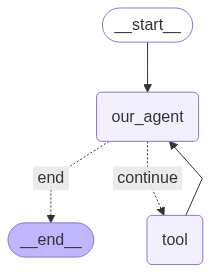

In [83]:
graph.add_node("our_agent" , model_call)
tool_node = ToolNode(tools=tools)
graph.add_node("tool" , tool_node)
graph.set_entry_point("our_agent")
graph.add_conditional_edges(
    "our_agent",
    should_continue,
    {
        "continue": "tool",
        "end": END
    }
)

graph.add_edge("tool", "our_agent")
app = graph.compile()
app

In [ ]:
conversation_memory = {"messages": []}
print("Hii I am Trip Assistant version 1.0 , I am here to help you regarding trip . how i help you")
    
while True:
    user_input = input("You: ")
        
    if user_input.lower() == "exit":
        print("Trip Assistant: Thank you for using Trip Assistant. Have a great trip!")
        break

    conversation_memory["messages"].append(HumanMessage(content=user_input))

    try:
        result = app.invoke(conversation_memory)

        conversation_memory = result
            
        last_message = conversation_memory["messages"][-1]
            
        if hasattr(last_message, 'content') and last_message.content:
            print("Trip Assistant:", last_message.content)
        else:
            print("Trip Assistant: I'm processing your request...")
                
    except Exception as e:
        print(f"Trip Assistant: Sorry, I encountered an error: {str(e)}")
        print("Trip Assistant: Please try again with a different query.")


Hii I am Trip Assistant version 1.0 , I am here to help you regarding trip . how i help you


You:  hi


Trip Assistant: Hi! I'm your Digital Travel Assistant. I can help you plan your trip. Where are you planning to go?


You:  I wanted to travel to ayodhiya


Trip Assistant: Ayodhya! A city in Uttar Pradesh, India. It's a legendary city and a sacred Hindu pilgrimage site, believed to be the birthplace of Lord Rama. The city has a rich cultural heritage and is home to many ancient temples, including the Ram Janmabhoomi, which is believed to be the exact birthplace of Lord Rama. The city is also known for its vibrant festivals, and the Ram Leela, a theatrical enactment of the Ramayana, is a major attraction.

Now, where are you starting your journey from?


You:  durg


Trip Assistant: Durg! A city in Chhattisgarh Pradesh, India.

To reach Ayodhya from Durg, I'll need to check the available transportation options for you.

Can I recommend trains, buses, or flights for you?


You:  train


Trip Assistant: There are several trains available from Durg to Ayodhya. Here are a few options:

1. **Durg - Ayodhya Express (18205)**: Departs from Durg Junction (DURG) at 20:15, reaches Ayodhya Junction (AY) at 14:30 (next day). 2nd AC tickets are available for ₹ 2,145, 3rd AC for ₹ 1,445, and Sleeper Class for ₹ 845.
2. **Durg - Varanasi Express (15119)**: Departs from Durg Junction (DURG) at 23:00, reaches Ayodhya Junction (AY) at 17:30 (next day). 2nd AC tickets are available for ₹ 2,345, 3rd AC for ₹ 1,645, and Sleeper Class for ₹ 945.
3. **Durg - Gorakhpur Express (15159)**: Departs from Durg Junction (DURG) at 23:30, reaches Ayodhya Junction (AY) at 19:30 (next day). 2nd AC tickets are available for ₹ 2,445, 3rd AC for ₹ 1,845, and Sleeper Class for ₹ 1,045.

Please note that ticket prices and availability may vary depending on the season and demand.

Would you like me to recommend hotels in Ayodhya?


You:  yes


Trip Assistant: Here are some hotel options in Ayodhya:

**Luxury Option:**

* **Hotel Ramaprastha** (5-star): Located near the Ram Janmabhoomi, this hotel offers luxurious rooms with modern amenities like free Wi-Fi, LED TV, and minibar. The hotel also has a rooftop restaurant, fitness center, and spa. Prices start from ₹ 6,000 per night**.

**Mid-Range Option:**

* **Hotel Sri Ram International** (3-star): This hotel is located near the Ayodhya Railway Station and offers comfortable rooms with amenities like free Wi-Fi, LED TV, and 24-hour room service. Prices start from ₹ 2,500 per night.

**Budget-Friendly Option:**

* **Hotel Shri Ram Vilas** (2-star): Located near the Ram Janmabhoomi, this hotel offers basic rooms with amenities like free Wi-Fi and 24-hour front desk. Prices start from ₹ 1,200 per night.

All hotels offer vegetarian food options, and some may have non-vegetarian options as well. Please note that prices may vary depending on the season and availability.

Would you